In [ ]:
import pandas as pd
import numpy as np

In [ ]:
beer_df = pd.read_csv(r"C:\Users\parag\Desktop\DS_Case_Study_beer-ratings_2020\train.csv")

In [ ]:
beer_df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,"Pours a clouded gold with a thin white head. Nose is quite floral with a larger amount of spices added. Definitely a spice forward fragrance. Flavor has an odd burn that hits on the first sip. After it fades it seems like a dirty vanilla aftertaste. Perhaps this is the absinthe? Regardless of that, I get a quite spiced tone on the tongue. Almost feel a little heat from it. I think that my inexperienced palate on these spices is contributing to my ignorance of what precisely they are. Overall a nice drinker indeed.","{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, 'year': 2008, 'wday': 1, 'mon': 12, 'isdst': 0, 'yday': 351}",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,"12oz bottle into 8oz snifter.\t\tDeep ruby red hue with a one finger light tan head that settles to a thin rim along the glass.\t\tSharp piercing hops with some light hard candy in the background. \t\tThe hops provide some bitterness, but they aren't as sharp as I would have expected. Mostly a light candy flavor like in the aroma. Full bodied with good carbonation. The finish is some lingering sweet flavor with a bit of bitterness.\t\tA very sweet barleywine with a weird hard candy flavor that seemed to dominate. Not bad, but I would have liked a little more complexity.","{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, 'year': 2008, 'wday': 4, 'mon': 8, 'isdst': 0, 'yday': 221}",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,"First enjoyed at the brewpub about 2 years ago, I finally managed to get a bottle.\tSlightly hazy orange-amber topped with a two finger foamy white head.\tVery nice fruity aroma, soft and floral, tea and toast.\tFruity, slightly grapefruity hop note, toast and biscuity malt balance. Hoppier and more floral when it warms up.\tLight-medium bodied, liked it better on draft but still a solid beer.","{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, 'year': 2004, 'wday': 4, 'mon': 11, 'isdst': 0, 'yday': 331}",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,"First thing I noticed after pouring from green bottle to glass was the skunky smell. Overpowering. Lacing was minimal and faded quickly. Bottle had exp date and was still within freshness date. \t\tTaste was like drinking a milwaukee's best with some skunk. Just couldn't get over the skunky smell to finish my second bottle. Almost $10 a sixer, I would have been better off getting Bud Light.","{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'year': 2011, 'wday': 0, 'mon': 6, 'isdst': 0, 'yday': 171}",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,"A: pours an amber with a one finger head but only with a very strong pour, head recedes to a light layer of foam with some large bubbles and good lacing\tS: sweet caramel and bread from the English malts comes through, some mild fruityness on the back end\tT: not a lot of complexity with this for me. I didn't expect much considering the style but it's just bland and lacking more bready layers\tM/D: more carbonated than I would have wanted. I would expect this to be much better on cask","{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, 'year': 2011, 'wday': 5, 'mon': 3, 'isdst': 0, 'yday': 71}",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [ ]:
beer_df.shape

(37500, 19)

In [ ]:
import datetime
beer_df['review/timeUnix'].head()

0    1229398690
1    1218238738
2    1101492422
3    1308532025
4    1299912708
Name: review/timeUnix, dtype: int64

In [ ]:
def convert_stamp_to_date(stamp):
    try:
        d = datetime.datetime.utcfromtimestamp(stamp)
    except:
        d = datetime.datetime.utcfromtimestamp(0)
    d = datetime.datetime(d.year, d.month, d.day)
    return d

In [ ]:
beer_df['review_date'] = beer_df['review/timeUnix'].apply(lambda x: convert_stamp_to_date(x))

In [ ]:
beer_df['review_date'].head()

0   2008-12-16
1   2008-08-08
2   2004-11-26
3   2011-06-20
4   2011-03-12
Name: review_date, dtype: datetime64[ns]

In [ ]:
beer_df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName,review_date
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,"Pours a clouded gold with a thin white head. Nose is quite floral with a larger amount of spices added. Definitely a spice forward fragrance. Flavor has an odd burn that hits on the first sip. After it fades it seems like a dirty vanilla aftertaste. Perhaps this is the absinthe? Regardless of that, I get a quite spiced tone on the tongue. Almost feel a little heat from it. I think that my inexperienced palate on these spices is contributing to my ignorance of what precisely they are. Overall a nice drinker indeed.","{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, 'year': 2008, 'wday': 1, 'mon': 12, 'isdst': 0, 'yday': 351}",1229398690,NaN,NaN,NaN,NaN,RblWthACoz,2008-12-16
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,"12oz bottle into 8oz snifter.\t\tDeep ruby red hue with a one finger light tan head that settles to a thin rim along the glass.\t\tSharp piercing hops with some light hard candy in the background. \t\tThe hops provide some bitterness, but they aren't as sharp as I would have expected. Mostly a light candy flavor like in the aroma. Full bodied with good carbonation. The finish is some lingering sweet flavor with a bit of bitterness.\t\tA very sweet barleywine with a weird hard candy flavor that seemed to dominate. Not bad, but I would have liked a little more complexity.","{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, 'year': 2008, 'wday': 4, 'mon': 8, 'isdst': 0, 'yday': 221}",1218238738,NaN,NaN,NaN,NaN,BeerSox,2008-08-08
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,"First enjoyed at the brewpub about 2 years ago, I finally managed to get a bottle.\tSlightly hazy orange-amber topped with a two finger foamy white head.\tVery nice fruity aroma, soft and floral, tea and toast.\tFruity, slightly grapefruity hop note, toast and biscuity malt balance. Hoppier and more floral when it warms up.\tLight-medium bodied, liked it better on draft but still a solid beer.","{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, 'year': 2004, 'wday': 4, 'mon': 11, 'isdst': 0, 'yday': 331}",1101492422,NaN,NaN,NaN,Male,mschofield,2004-11-26
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,"First thing I noticed after pouring from green bottle to glass was the skunky smell. Overpowering. Lacing was minimal and faded quickly. Bottle had exp date and was still within freshness date. \t\tTaste was like drinking a milwaukee's best with some skunk. Just couldn't get over the skunky smell to finish my second bottle. Almost $10 a sixer, I would have been better off getting Bud Light.","{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'year': 2011, 'wday': 0, 'mon': 6, 'isdst': 0, 'yday': 171}",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76,2011-06-20
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,"A: pours an amber with a one finger head but only with a very strong pour, head recedes to a light layer of foam with some large bubbles and good lacing\tS: sweet caramel and bread from the English malts comes through, some mild fruityness on the back end\tT: not a lot of complexity with this for me. I didn't expect much considering the style but it's just bland and lacking more bready layers\tM/D: more carbonated than I would have wanted. I would expect this to be much better on cask","{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, 'year': 2011, 'wday': 5, 'mon': 3, 'isdst': 0, 'yday': 71}",1299912708,NaN,NaN,NaN,NaN,Brewbro000,2011-03-12


In [ ]:
beer_df["day"] = beer_df['review_date'].map(lambda x: x.day)
beer_df["month"] = beer_df['review_date'].map(lambda x: x.month)
beer_df["year"] = beer_df['review_date'].map(lambda x: x.year)

In [ ]:
beer_df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,...,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName,review_date,day,month,year
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,...,1229398690,NaN,NaN,NaN,NaN,RblWthACoz,2008-12-16,16,12,2008
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,...,1218238738,NaN,NaN,NaN,NaN,BeerSox,2008-08-08,8,8,2008
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,...,1101492422,NaN,NaN,NaN,Male,mschofield,2004-11-26,26,11,2004
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,...,1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76,2011-06-20,20,6,2011
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,...,1299912708,NaN,NaN,NaN,NaN,Brewbro000,2011-03-12,12,3,2011


In [ ]:
beer_df.shape

(37500, 23)

In [ ]:
beer_df.columns

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName', 'review_date',
       'day', 'month', 'year'],
      dtype='object')

In [ ]:
beer_df.isnull().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
review_date              0
day                      0
month                    0
year                     0
dtype: int64

In [ ]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 23 columns):
index                37500 non-null int64
beer/ABV             37500 non-null float64
beer/beerId          37500 non-null int64
beer/brewerId        37500 non-null int64
beer/name            37500 non-null object
beer/style           37500 non-null object
review/appearance    37500 non-null float64
review/aroma         37500 non-null float64
review/overall       37500 non-null float64
review/palate        37500 non-null float64
review/taste         37500 non-null float64
review/text          37490 non-null object
review/timeStruct    37500 non-null object
review/timeUnix      37500 non-null int64
user/ageInSeconds    7856 non-null float64
user/birthdayRaw     7856 non-null object
user/birthdayUnix    7856 non-null float64
user/gender          15314 non-null object
user/profileName     37495 non-null object
review_date          37500 non-null datetime64[ns]
day                  3

In [ ]:
beer_df.rename(columns={'beer/ABV':'beer_abv', 'beer/beerId':'beer_beerid', 'beer/brewerId':'beer_brewerId', 'beer/name':'beer_name', 'beer/style':'beer_style','review/aroma':'review_aroma', 'review/overall':'review_overall','review/taste':'review_taste','review/text':'review_text','user/profileName':'user_profileName'}, inplace=True)

In [ ]:
beer_df.head()

,index,beer_abv,beer_beerid,beer_brewerId,beer_name,beer_style,review/appearance,review_aroma,review_overall,review/palate,...,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user_profileName,review_date,day,month,year
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,...,1229398690,NaN,NaN,NaN,NaN,RblWthACoz,2008-12-16,16,12,2008
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,...,1218238738,NaN,NaN,NaN,NaN,BeerSox,2008-08-08,8,8,2008
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,...,1101492422,NaN,NaN,NaN,Male,mschofield,2004-11-26,26,11,2004
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,...,1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76,2011-06-20,20,6,2011
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,...,1299912708,NaN,NaN,NaN,NaN,Brewbro000,2011-03-12,12,3,2011


In [ ]:
# total customers
customers=beer_df['user_profileName'].nunique()
# total beers by style
beer_style=beer_df['beer_style'].nunique()
# total beers by Id
beer_Id=beer_df['beer_beerid'].nunique()
# total beers by brewerId
beer_brewerId=beer_df['beer_brewerId'].nunique()

original="The dataset has {} customers,".format(customers), "{} styles of beer,".format(beer_style), "and {} beers".format(beer_Id)
print(original)

('The dataset has 7441 customers,', '95 styles of beer,', 'and 1731 beers')


In [ ]:
beer_df1 = beer_df.drop(['review/timeStruct','review/timeUnix','user/ageInSeconds','user/birthdayRaw','user/birthdayUnix','user/gender','review/palate','review/appearance'],1)

In [ ]:
beer_df1.head()

,index,beer_abv,beer_beerid,beer_brewerId,beer_name,beer_style,review_aroma,review_overall,review_taste,review_text,user_profileName,review_date,day,month,year
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,"Pours a clouded gold with a thin white head. Nose is quite floral with a larger amount of spices added. Definitely a spice forward fragrance. Flavor has an odd burn that hits on the first sip. After it fades it seems like a dirty vanilla aftertaste. Perhaps this is the absinthe? Regardless of that, I get a quite spiced tone on the tongue. Almost feel a little heat from it. I think that my inexperienced palate on these spices is contributing to my ignorance of what precisely they are. Overall a nice drinker indeed.",RblWthACoz,2008-12-16,16,12,2008
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,3.5,3.5,3.0,"12oz bottle into 8oz snifter.\t\tDeep ruby red hue with a one finger light tan head that settles to a thin rim along the glass.\t\tSharp piercing hops with some light hard candy in the background. \t\tThe hops provide some bitterness, but they aren't as sharp as I would have expected. Mostly a light candy flavor like in the aroma. Full bodied with good carbonation. The finish is some lingering sweet flavor with a bit of bitterness.\t\tA very sweet barleywine with a weird hard candy flavor that seemed to dominate. Not bad, but I would have liked a little more complexity.",BeerSox,2008-08-08,8,8,2008
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),4.0,3.5,3.5,"First enjoyed at the brewpub about 2 years ago, I finally managed to get a bottle.\tSlightly hazy orange-amber topped with a two finger foamy white head.\tVery nice fruity aroma, soft and floral, tea and toast.\tFruity, slightly grapefruity hop note, toast and biscuity malt balance. Hoppier and more floral when it warms up.\tLight-medium bodied, liked it better on draft but still a solid beer.",mschofield,2004-11-26,26,11,2004
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,2.5,3.0,"First thing I noticed after pouring from green bottle to glass was the skunky smell. Overpowering. Lacing was minimal and faded quickly. Bottle had exp date and was still within freshness date. \t\tTaste was like drinking a milwaukee's best with some skunk. Just couldn't get over the skunky smell to finish my second bottle. Almost $10 a sixer, I would have been better off getting Bud Light.",molegar76,2011-06-20,20,6,2011
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,3.0,3.0,2.5,"A: pours an amber with a one finger head but only with a very strong pour, head recedes to a light layer of foam with some large bubbles and good lacing\tS: sweet caramel and bread from the English malts comes through, some mild fruityness on the back end\tT: not a lot of complexity with this for me. I didn't expect much considering the style but it's just bland and lacking more bready layers\tM/D: more carbonated than I would have wanted. I would expect this to be much better on cask",Brewbro000,2011-03-12,12,3,2011


In [ ]:
beer_df1.shape

(37500, 15)

In [ ]:
beer_df1['review_text'].fillna('NOreview', inplace=True)

In [ ]:
beer_df1['user_profileName'].fillna('Notspecify', inplace=True)

In [ ]:
beer_df1.isnull().sum()

index               0
beer_abv            0
beer_beerid         0
beer_brewerId       0
beer_name           0
beer_style          0
review_aroma        0
review_overall      0
review_taste        0
review_text         0
user_profileName    0
review_date         0
day                 0
month               0
year                0
dtype: int64

In [ ]:
style_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in beer_df1['beer_style']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    style_words += " ".join(tokens)+" "

(-0.5, 1499.5, 1499.5, -0.5)

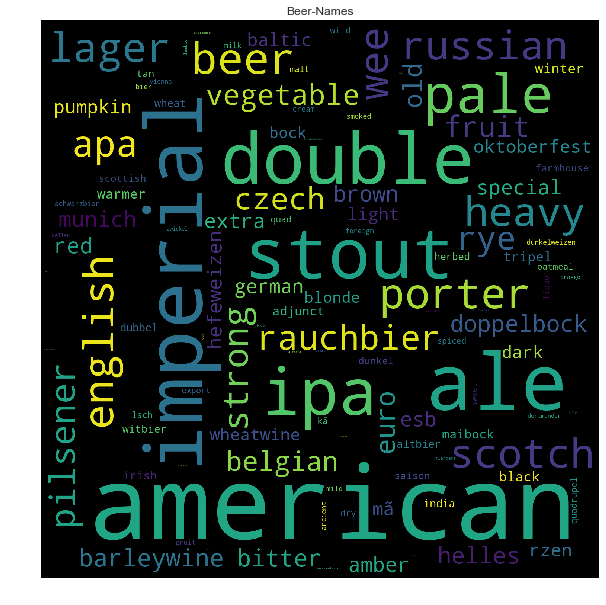

In [ ]:
plt.figure(figsize=(10,20))
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
              width=1500, height=1500).generate(style_words)
plt.imshow(wordcloud)
plt.title('Beer-Names')
plt.axis("off")

In [ ]:
beer_style_count = beer_df1.groupby('beer_beerid').agg(dict(beer_name='first',beer_style='first', beer_brewerId='first',beer_abv='first', review_overall= 'first', review_aroma='first', review_taste='first')).reset_index()
beer_style_count

,beer_beerid,beer_name,beer_style,beer_brewerId,beer_abv,review_overall,review_aroma,review_taste
0,175,Nine Man Ale Golden Ale,American Blonde Ale,60,4.30,4.0,4.0,3.0
1,176,Benchwarmer Porter,English Porter,60,6.30,4.0,4.0,4.0
2,178,Strike Out Stout,English Stout,60,4.60,4.5,4.0,4.5
3,429,Pilsner Urquell,Czech Pilsener,1,4.40,2.5,3.0,3.0
4,436,Amstel Light,Light Lager,163,3.50,2.0,2.0,2.0
5,454,Bannatyne's Scotch Ale,Scotch Ale / Wee Heavy,14,9.20,2.5,3.0,2.5
6,503,Dunkles Weizen,Dunkelweizen,14,5.60,4.0,4.0,4.0
7,505,Big Man Ale,American IPA,14,6.80,4.0,3.5,4.0
8,507,Hefeweizen,Hefeweizen,14,6.00,4.5,4.5,4.0
9,508,Bitchin' Special Bitter,Extra Special / Strong Bitter (ESB),14,4.70,3.0,3.0,4.0


In [ ]:
beer_style_number = beer_style_count['beer_style'].value_counts()
print("Total number of beer types: ", len(beer_style_number))
beer_style_number

Total number of beer types:  95


American IPA                           109
American Pale Ale (APA)                 76
American Porter                         73
English Bitter                          70
Euro Pale Lager                         66
American Amber / Red Ale                59
American Double / Imperial IPA          52
English Pale Ale                        44
American Stout                          38
American Blonde Ale                     34
Fruit / Vegetable Beer                  34
Hefeweizen                              32
Czech Pilsener                          30
Belgian Pale Ale                        30
Extra Special / Strong Bitter (ESB)     29
Scotch Ale / Wee Heavy                  28
American Barleywine                     26
German Pilsener                         26
American Pale Wheat Ale                 25
American Double / Imperial Stout        25
American Brown Ale                      24
Euro Strong Lager                       23
English Brown Ale                       22
Witbier    

Beer with top ratings:----- 
American IPA                      109
American Pale Ale (APA)            76
American Porter                    73
English Bitter                     70
Euro Pale Lager                    66
American Amber / Red Ale           59
American Double / Imperial IPA     52
English Pale Ale                   44
American Stout                     38
American Blonde Ale                34
Fruit / Vegetable Beer             34
Hefeweizen                         32
Name: beer_style, dtype: int64


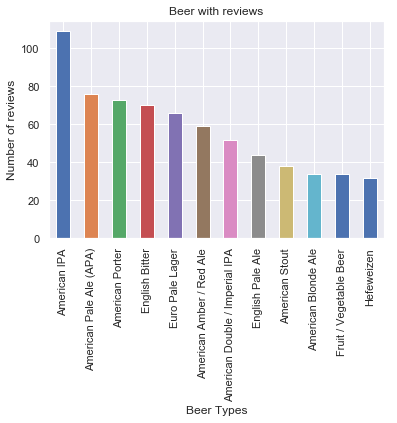

In [ ]:
beer_style_number[:12].plot(kind='bar')
plt.title('Beer with reviews')
plt.xlabel('Beer Types')
plt.ylabel('Number of reviews')

print("Beer with top ratings:----- \n{}".format(beer_style_number[:12]))

In [ ]:
beer_style_count.head(10)

,beer_beerid,beer_name,beer_style,beer_brewerId,beer_abv,review_overall,review_aroma,review_taste
0,175,Nine Man Ale Golden Ale,American Blonde Ale,60,4.3,4.0,4.0,3.0
1,176,Benchwarmer Porter,English Porter,60,6.3,4.0,4.0,4.0
2,178,Strike Out Stout,English Stout,60,4.6,4.5,4.0,4.5
3,429,Pilsner Urquell,Czech Pilsener,1,4.4,2.5,3.0,3.0
4,436,Amstel Light,Light Lager,163,3.5,2.0,2.0,2.0
5,454,Bannatyne's Scotch Ale,Scotch Ale / Wee Heavy,14,9.2,2.5,3.0,2.5
6,503,Dunkles Weizen,Dunkelweizen,14,5.6,4.0,4.0,4.0
7,505,Big Man Ale,American IPA,14,6.8,4.0,3.5,4.0
8,507,Hefeweizen,Hefeweizen,14,6.0,4.5,4.5,4.0
9,508,Bitchin' Special Bitter,Extra Special / Strong Bitter (ESB),14,4.7,3.0,3.0,4.0


In [ ]:
beer_abv = beer_style_count.groupby('beer_style').agg(dict(beer_abv='mean')).reset_index()
beer_abv.sort_values('beer_abv', ascending=False,)

,beer_style,beer_abv
40,Eisbock,42.750000
79,Quadrupel (Quad),11.275000
41,English Barleywine,10.931250
92,Wheatwine,10.833333
4,American Barleywine,10.592308
91,Weizenbock,10.525000
11,American Double / Imperial Stout,9.856000
81,Russian Imperial Stout,9.535294
19,American Strong Ale,9.393750
31,Braggot,9.373333


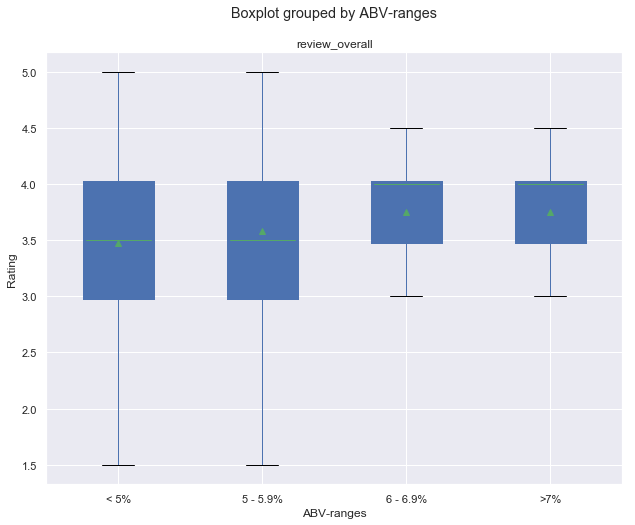

In [ ]:
beer_style_count['ABV-ranges'] = pd.qcut(beer_style_count['beer_abv'], 4, labels=['< 5%', '5 - 5.9%', '6 - 6.9%', '>7%'])
beer_style_count.boxplot(column='review_overall', by='ABV-ranges',figsize=(10,8),patch_artist=True,boxprops = dict(linestyle='-', linewidth=7, color='k'),showfliers=False, showmeans=True)
plt.ylabel('Rating')
plt.show()

In [ ]:
#beer_quality
beer_quality = beer_style_count.groupby('beer_style').agg(dict(review_taste='mean')).reset_index()
beer_quality.sort_values('review_taste', ascending=False)


,beer_style,review_taste
41,English Barleywine,4.187500
77,Old Ale,4.125000
11,American Double / Imperial Stout,4.120000
21,Baltic Porter,4.111111
81,Russian Imperial Stout,4.058824
17,American Porter,4.006849
40,Eisbock,4.000000
82,Rye Beer,4.000000
38,Dubbel,4.000000
29,Black & Tan,4.000000


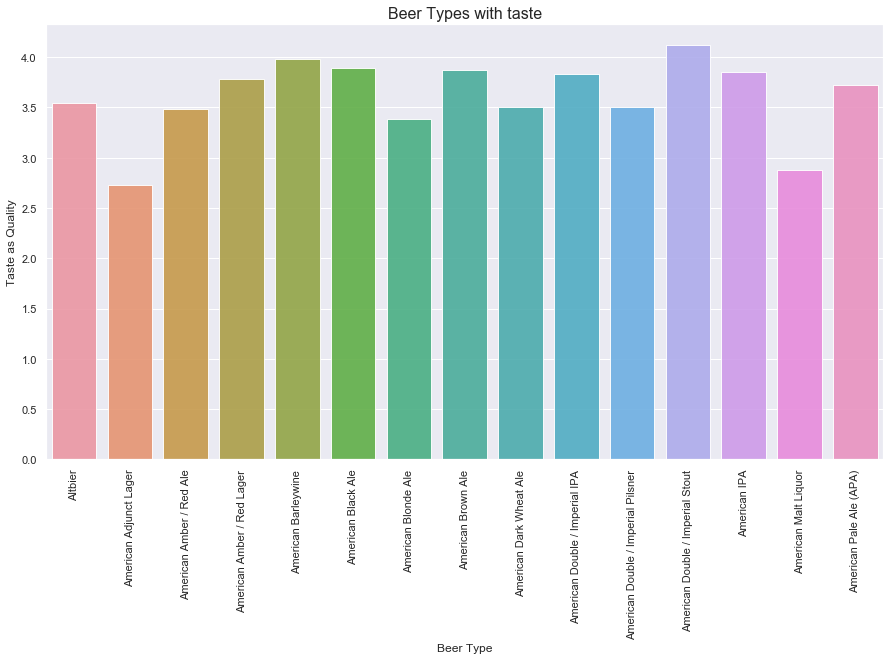

In [ ]:
beer_quality = beer_quality[:15]
plt.figure(figsize=(15,8))
sns.barplot(beer_quality['beer_style'], beer_quality['review_taste'], alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel("Beer Type", fontsize=12)
plt.ylabel("Taste as Quality", fontsize=12)
plt.title("Beer Types with taste", fontsize=16)
plt.show()

In [ ]:
beer_aroma = beer_style_count.groupby('beer_style').agg(dict(review_aroma='mean')).reset_index()
beer_aroma.sort_values('review_aroma', ascending=False)

,beer_style,review_aroma
31,Braggot,4.166667
20,American Wild Ale,4.083333
92,Wheatwine,4.000000
29,Black & Tan,4.000000
28,BiÃ¨re de Garde,4.000000
27,Berliner Weissbier,4.000000
77,Old Ale,4.000000
41,English Barleywine,4.000000
17,American Porter,3.945205
5,American Black Ale,3.944444


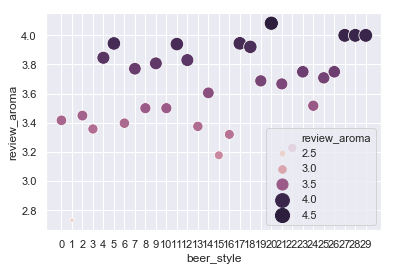

In [ ]:
#Create a scatter plot for beer aroma reviews 
beer_aroma = beer_aroma[:30]
#aroma = sns.load_dataset('beer_aroma')
sns.set()
ax = sns.scatterplot(x="beer_style", y=beer_aroma["review_aroma"], hue='review_aroma', size=beer_aroma["review_aroma"], sizes=(20, 200), data=beer_aroma)
ax.set_xticklabels(range(50));

In [ ]:
# Beer aroma list which is plotted above.
beer_aroma.sort_values('review_aroma', ascending=False,)[:30]

,beer_style,review_aroma
20,American Wild Ale,4.083333
29,Black & Tan,4.000000
27,Berliner Weissbier,4.000000
28,BiÃ¨re de Garde,4.000000
17,American Porter,3.945205
5,American Black Ale,3.944444
11,American Double / Imperial Stout,3.940000
18,American Stout,3.921053
4,American Barleywine,3.846154
12,American IPA,3.830275


In [ ]:
beer_style_count['total_reviews'] =0
beer_overall_best = beer_style_count.groupby(['beer_style']).agg(dict(beer_beerid='first',beer_brewerId='first', beer_name='first', total_reviews='count', review_overall='median', review_taste='mean', review_aroma='mean', beer_abv='mean')).reset_index()
beer_overall_best.sort_values(by='total_reviews', ascending=False)

,beer_style,beer_beerid,beer_brewerId,beer_name,total_reviews,review_overall,review_taste,review_aroma,beer_abv
12,American IPA,505,14,Big Man Ale,109,4.00,3.853211,3.830275,6.542202
14,American Pale Ale (APA),513,14,Tall Tale Pale Ale,76,4.00,3.723684,3.605263,5.275526
17,American Porter,515,14,Charles River Porter,73,4.00,4.006849,3.945205,6.442466
42,English Bitter,5008,1417,Black Sheep Best Bitter,70,3.50,3.578571,3.492857,4.241429
52,Euro Pale Lager,1414,163,Amstel Lager,66,3.00,2.636364,2.689394,4.909091
2,American Amber / Red Ale,514,14,Cambridge Amber,59,3.50,3.483051,3.449153,5.458475
9,American Double / Imperial IPA,4374,1386,Rajah's Royal IPA,52,4.00,3.836538,3.807692,8.821154
46,English Pale Ale,3824,1417,Monty Python's Holy Grail Ale,44,3.50,3.443182,3.261364,4.770455
18,American Stout,511,14,Beantowne Espresso Stout,38,4.00,3.855263,3.921053,5.922895
6,American Blonde Ale,175,60,Nine Man Ale Golden Ale,34,3.50,3.382353,3.397059,4.717647


In [ ]:
beer_overall_best.sort_values(by='review_taste', ascending=False)[:10]

,beer_style,beer_beerid,beer_brewerId,beer_name,total_reviews,review_overall,review_taste,review_aroma,beer_abv
41,English Barleywine,30704,2600,Barleymow,8,4.25,4.187500,4.000000,10.931250
77,Old Ale,15244,2098,Festivale,12,4.25,4.125000,4.000000,9.246667
11,American Double / Imperial Stout,11757,1199,Founders Breakfast Stout,25,4.00,4.120000,3.940000,9.856000
21,Baltic Porter,1504,568,Okocim Porter,9,4.00,4.111111,3.666667,8.088889
81,Russian Imperial Stout,20757,850,Black River Imperial Stout,17,4.00,4.058824,3.882353,9.535294
17,American Porter,515,14,Charles River Porter,73,4.00,4.006849,3.945205,6.442466
40,Eisbock,51466,6513,SchorschbrÃ¤u Schorschbock 31%,4,3.50,4.000000,3.875000,42.750000
82,Rye Beer,5657,1413,Road Rage Rye,21,4.00,4.000000,3.857143,6.309524
38,Dubbel,1549,394,Stoudt's Abbey Double Ale,19,4.00,4.000000,3.815789,7.594737
29,Black & Tan,33662,14879,Bodacious Black & Tan,1,4.00,4.000000,4.000000,7.600000


In [ ]:
# customer behavior 
beers_each_day=beer_df1.groupby(['user_profileName', 'year', 'month', 'day']).agg({'beer_name':'nunique'})
beers_each_day.reset_index(inplace=True)
beers_each_day = beers_each_day.rename(columns={'beer_name': 'beers_by_day'})
beers_each_day.sort_values(by=['user_profileName'], ascending=False).head(10)

,user_profileName,year,month,day,beers_by_day
34287,zymurgy4all,2008,6,8,1
34286,zymurgy4all,2008,3,1,1
34285,zuker,2005,3,1,1
34284,zuggy9,2007,1,8,1
34283,zuggy9,2006,12,21,1
34282,ztaylor1,2011,1,21,1
34281,ztaylor1,2010,12,28,1
34280,ztaylor1,2010,12,18,1
34276,zrab11,2011,7,2,1
34274,zrab11,2011,4,19,2


In [ ]:
beers_each_day.sort_values(by=['beers_by_day'], ascending=False).head(10)

,user_profileName,year,month,day,beers_by_day
28687,philbertk,2010,7,13,10
10868,RblWthACoz,2007,12,31,9
13340,Thorpe429,2009,10,5,9
14902,adamette,2009,10,19,9
22630,hopdog,2008,12,17,8
10867,RblWthACoz,2007,12,30,8
26649,mikesgroove,2011,9,25,8
18592,charlzm,2011,11,8,7
25109,kmpitz2,2004,11,21,7
5519,GRG1313,2009,9,5,7


In [ ]:
pd.options.display.max_colwidth = 1000
customer1=beer_df1.loc[beer_df1['user_profileName'] == 'philbertk',['review_text']]
customer1

,review_text
769,Caldera Brewing Company--Ashland Amber--Oregon Brewed Amber Ale--2009 12 oz. Micro Can. 5.40% ABV on Can--24 IBU's. (4.25 / 5.0) 5.6% ABV on Web Page. Light sediment. Thin mild lace off white head. Pretty clear bright rich amber color. Toasted fruit malt floral hop front. Earthy cloying crusty mild sweet toasted caramel fruit doughy body. Smooth cloying malty eartthy mild hop spice clean end. Nice. Sampled 8/18/2009. 6-Pack $10.99.
1352,"Pike Brewing Company--Naughty Nellie's Ale--2001 12 oz. Bottle. 4.70% ABV. (4.0 / 5.0) Golden Ale. Clear rich bright golden red color unhazed by conditioning residue. Nice floral hop bouquet fronts tasty golden ale mild crisp sweet malty fruit body. Mild balanced refreshing end with minimal spiciness. Sampled 5/13/2001. \t\tPike Brewing Company--Naughty Nellie's Ale--2003 12 oz. 4.70% ABV. (4.0 / 5.0) Golden Ale. Hazy Bottle Conditioned amber golden color. Mild lace head. Mild floral hop fruit yeast spice front. Clean smooth slightly crusty tangy sweet mild caramel fruit apple peach body. Clean mild hop end. Balanced & Complex. Sampled 4/4/2004. \t\tPike Brewing Company--Naughty Nellie's Ale--2004 12 oz. Bottle. 4.70% ABV. 22 IBU's. (4.25 / 5.0) Golden Ale. Clear light amber golden color. Light lace head. Mild crisp hop aroma. Tangy crisp quenching doughy butter caramel dry sweet mild fruit nut body. Clean mild hop balanced end. Tasty ""Session Beer."" Sampled 4/7/2004. \t\tPike Brew..."
10355,Pike Brewing Company--Pike Entire Wood Aged Stout--2008 Release--22 oz. Bottle--9.50% ABV--60 IBU's. (4.0 / 5.0) Stout--Imperial. Wax sealed. Thin lace espresso head. No sediment. Opaque chocolate black ruby color. Roasted chocolate mild oak hop front. Creamy sweet rich bourbon oak roasted chocolate espresso smooth big Stout body. Balanced mild bitter hop bourbon EtOH hint mild hot end. Sampled 2/1/2009. $12.99 Each. \t\tPike Entire Wood Aged Stout--Brewer - Drew Cluley--2009 22 oz. Bottle. 9.50% ABV. 60 IBU's. (0.0 / 5.0) Stout--Imperial. Wax Sealed Bottle. Huge foamy mild lace tan head. Opaque dark black color. Fruity burnt oak foamy front. Fizzy mild sweet thin sour Stout body Rich infected sediment. Dry citrus sour end. BAD! DUMPED! Sampled 4/30/2010. $10.79 Each. Cellered under good storage conditions since purchase. Very dissappointing. One scary bottle left. 2008 was good. Brewer says they failed to catch a few infected barrels before they got into circulation.
12445,Pike Brewing Company--Pike Double IPA Double India Pale Ale--Seattle Beer Week May 7-17 Commemorative 2009--2009 Release--22 oz. Bottle--8.00% ABV--80 IBU's. (4.5 / 5.0) IPA--Imperial--Thin lacy touch off white head. Cloudy no sediment bright orange gold color. Rich floral herbal grassy pine hop front. Crisp tangy mild sweet caramel fruit ester citrus grapefruit malty body. Rich hop citrus spice balanced mild EtOH end. Rich fresh zesty brew. Sampled 4/27/2009. $6.49 Each. \t\tPike Double IPA Double India Pale Ale--2010--22 oz. Bottle. 8.00% ABV. 80 IBU's. (3.5 / 5.0) IPA--Imperial. Off white very thin no lace head. Loose fruity sediment. Pretty cloudy bright orange color. Malty floral sweet pine caramel fruit hop front. Sweet fruity malty resinous caramel sediment fruity estery body. EtOH hint bitter lingering crusty dry citrus hop resin end. Going fruity fast. Sampled 5/5/2010. $5.99 Each. \t\tResampled 5/6/2010. Fruity notes were muted in the two bottles tasted. Smoothly cloying ...
13914,"Pike Weisse--5 oz. Taster at Pike Pub May 9th, 2010. 5.0% ABV. 24 IBU's. Mild lace white head. Clear thin bright yellow color. Bavarian coriander banana front. Crisp refreshing spicy Bavarian wheat body. Cloying Bavarian Hefe mild citrus end. (4.0 / 5.0) Classic flavor. Very refreshing."
18253,Pike Brewing Company--Pike Pale Ale--1998 22 oz. Bottle. 5.00% ABV. (4.5 / 5.0) Rich clear copper amber golden color. Buttery rich crystal malt body with hints of nuts and toffee. Light hop aroma and finish is just enough to accent wonderful

In [ ]:
pd.options.display.max_colwidth = 1000
customer1=beer_df1.loc[beer_df1['user_profileName'] == 'RblWthACoz',['review_text']]
customer1

,review_text
0,"Pours a clouded gold with a thin white head. Nose is quite floral with a larger amount of spices added. Definitely a spice forward fragrance. Flavor has an odd burn that hits on the first sip. After it fades it seems like a dirty vanilla aftertaste. Perhaps this is the absinthe? Regardless of that, I get a quite spiced tone on the tongue. Almost feel a little heat from it. I think that my inexperienced palate on these spices is contributing to my ignorance of what precisely they are. Overall a nice drinker indeed."
42,"Off notes from 3-2007. Pours a clouded garnet/ruby with a nice tan head that falls. Nose is beautiful. Strong wood influence with cherry tones. You can tell this was made with care. Flavor is a mild wood with a stronger cherry profile. Feel has a thick bubble to it that hits the back of my mouth and leaves quickly. The liquid feel seems a bit thin. This reminds me oh so much of a lambic. Overall, very drinkable. It might have to be your cup of tea, but I dig it. If you like lambics, you will like this. After two 9 ounce beers and a burger, this was my dessert. As it got closer to the end, I wished there would have been more. \t\tI weep for you if you go in and this beer is not available."
3734,I got the last bit of this one out of the cask. Pours a slightly clouded amber with a frothy creme head. Nose is fruity nuts. Flavor oddly reminds me of a white wine. Chalky dryness. Feel is smooth and drier like a cotton ball. Very nice ESB. Could go for numerous of these.
4201,"Pours an almost opaque black with ruby lining the edges. Nose is strong with chocolatey roasted goodness. Flavor is slightly bold with coffee tones, but also an interesting infusion of hops at the end after the coffee hits you. Feel is silky over the tongue. Definitely drinkable. Smooth and pleasurable. This wont go down as the world's greatest porter, but it's a pretty good one overall."
4321,"Hop allergies be damned! \t\tPours nicely. Foggy yellow orange with a thick creme head that leaves a very thick lacing on the way down. Nose is tangy citrus with heavy pine tones. Flavor is extremely smooth. Extremely. There is still a bite of pine and hop tones with fairly strong bitter aftertastes and a slight salty thing in the back of my mouth. But like I said, it is really easy to swig this one down. Feel is smooth on liquid, carbonation is lower. I can dig this. A bit acidic and biting, but in the right ways."
5406,"Pours a clear, but darker ruby hued brown. Thin light tan head. Flavor is sweet, and too much so I have to say. Calms down a bit over time, but the memory of it sticks with me. Fruit tones and a tart bitterness ride on the backside of things. Feel is slick on liquid and the carbonation is slightly subdued. This is an okay beer. As it warms it's initially abrasive qualities seem to calm down a bit and I enjoy it more than I thought I would."
6072,Pours a dark brown with basically no head. Nose is like roasted qualities. Flavor is roasted and just an old coffee bean kinda flavor profile. Feel is standard. Just feels a touch light. Lots of carbonation. Overall this is an odd porter. I can't really put it up against others I have had as far as similarities go. The body seems lighter for a porter. Overall though it is pretty drinkable. I would just never go back to it.
7821,"Pours a foggy orange hued brown. Decent creme head. Nutty nose. Flavor is unusual. A bit tangy with citrus and a very noticeable nutty character. Feel has a sharp carbonation that nips the tongue. Liquid is a bit thicker and sticky. An interesting APA. Doesn't really fit what I consider the style to be, but it works. \t\tThanks to Cresant for a chance to try this one."
10761,"Pours pitch black with a dark tan head. Nose is coffee, molasses. Flavor is oustanding. Unbelievably thick and complex. Loads of coffee. Good amount of molasses. Massive malts. It's like a meal in a bottle. Feel is smooth on liquid and with a minimal carbonation. This is a damn good bee

In [ ]:
df=pd.merge(beer_df1, beers_each_day)
df.shape


(37500, 16)

In [ ]:
def recode(row):
    if row['beers_by_day'] >=10:
        val = 1
    else:
        val = 0
    return val

In [ ]:
df['more_beers_than_10'] = df.apply (recode, axis=1)

In [ ]:
more_than_ten=df.groupby(['user_profileName']).agg({'more_beers_than_10':'sum'})
more_than_ten.reset_index(inplace=True)
more_than_ten = more_than_ten.rename(columns={'more_beers_than_10': 'too_much_beers'})
more_than_ten.sort_values(by=['too_much_beers'], ascending=False).head(10)

,user_profileName,too_much_beers
6173,philbertk,10
0,0110x011,0
4957,jakeyb,0
4969,jamiesessions,0
4968,jamiejohnson,0
4967,jamie2dope,0
4966,jamespub,0
4965,jamesm7485,0
4964,jamesclark,0
4963,jamescain,0


In [ ]:
df=pd.merge(df, more_than_ten, on='user_profileName')

In [ ]:
df.shape

(37500, 18)

In [ ]:
df.filter(items=['user_profileName', 'too_much_beers', 'day', 'beer_name']).head()

,user_profileName,too_much_beers,day,beer_name
0,RblWthACoz,0,16,Chiostro
1,RblWthACoz,0,31,Cerise CassÃ©e American Sour Ale
2,RblWthACoz,0,31,Charles River Porter
3,RblWthACoz,0,31,Benchwarmer Porter
4,RblWthACoz,0,31,Stoudts Pils


In [ ]:
df_final=df[(df.too_much_beers == 0) ]
df_final.shape

(37484, 18)

In [ ]:
# total customers
customers=df_final['user_profileName'].nunique()
# total beers by style
beer_style=df_final['beer_style'].nunique()
# total beers by Id
beer_Id=df_final['beer_beerid'].nunique()
# total beers by brewerId
beer_brewerId=df_final['beer_brewerId'].nunique()

final= "The final dataset has {} customers,".format(customers), "{} styles of beer,".format(beer_style), "and {} beers".format(beer_Id)

print (original)
print (final)

('The dataset has 7441 customers,', '95 styles of beer,', 'and 1731 beers')
('The final dataset has 7441 customers,', '95 styles of beer,', 'and 1731 beers')


In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
df_final1= beer_overall_best.sort_values(by='total_reviews', ascending=False)

In [ ]:
df_final1.head()

,beer_style,beer_beerid,beer_brewerId,beer_name,total_reviews,review_overall,review_taste,review_aroma,beer_abv
12,American IPA,505,14,Big Man Ale,109,4.0,3.853211,3.830275,6.542202
14,American Pale Ale (APA),513,14,Tall Tale Pale Ale,76,4.0,3.723684,3.605263,5.275526
17,American Porter,515,14,Charles River Porter,73,4.0,4.006849,3.945205,6.442466
42,English Bitter,5008,1417,Black Sheep Best Bitter,70,3.5,3.578571,3.492857,4.241429
52,Euro Pale Lager,1414,163,Amstel Lager,66,3.0,2.636364,2.689394,4.909091


In [ ]:
df_final2=df_final1[['beer_beerid','beer_brewerId','total_reviews','review_overall']]

In [ ]:
df_final2.head()

,beer_beerid,beer_brewerId,total_reviews,review_overall
12,505,14,109,4.0
14,513,14,76,4.0
17,515,14,73,4.0
42,5008,1417,70,3.5
52,1414,163,66,3.0


In [ ]:
def new_review_overall(review_overall):
    if review_overall >=4.0:
        return 1
    else:
        return 0

In [ ]:
df_final2['review_overall'] = df_final2['review_overall'].apply(new_review_overall)

C:\Users\parag\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_final2.head()

,beer_beerid,beer_brewerId,total_reviews,review_overall
12,505,14,109,1
14,513,14,76,1
17,515,14,73,1
42,5008,1417,70,0
52,1414,163,66,0


In [ ]:
df = df_final2

In [ ]:
df.head()

,beer_beerid,beer_brewerId,total_reviews,review_overall
12,505,14,109,1
14,513,14,76,1
17,515,14,73,1
42,5008,1417,70,0
52,1414,163,66,0


In [ ]:
x = df.drop(['review_overall'],axis=1)

In [ ]:
x.head()

,beer_beerid,beer_brewerId,total_reviews
12,505,14,109
14,513,14,76
17,515,14,73
42,5008,1417,70
52,1414,163,66


In [ ]:
y = df['review_overall']

In [ ]:
y.head()

12    1
14    1
17    1
42    0
52    0
Name: review_overall, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
le = LabelEncoder()

In [ ]:
y = le.fit_transform(y)

In [ ]:
y

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split as tts 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\parag\ana\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
y_pred = logreg.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
logreg.score(x_test, y_test)

0.5172413793103449

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 4 12]
 [ 2 11]]


In [ ]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)


Predicted,0,1,All
Actual,,,
0,4,12,16
1,2,11,13
All,6,23,29


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.25      0.36        16
           1       0.48      0.85      0.61        13

   micro avg       0.52      0.52      0.52        29
   macro avg       0.57      0.55      0.49        29
weighted avg       0.58      0.52      0.47        29

